In [1]:
from random import random
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv('manufacturing_defect_dataset.csv')
df.head()

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
0,202,13175.403783,86.648534,1,3.121492,63.463494,9,0.052343,8.630515,0.081322,85.042379,0,2419.616785,0.468947,5.551639,236.439301,1
1,535,19770.046093,86.310664,4,0.819531,83.697818,20,4.908328,9.296598,0.038486,99.657443,7,3915.566713,0.119485,9.080754,353.957631,1
2,960,19060.820997,82.132472,0,4.514504,90.350550,1,2.464923,5.097486,0.002887,92.819264,2,3392.385362,0.496392,6.562827,396.189402,1
3,370,5647.606037,87.335966,5,0.638524,67.628690,8,4.692476,3.577616,0.055331,96.887013,8,4652.400275,0.183125,8.097496,164.135870,1
4,206,7472.222236,81.989893,3,3.867784,82.728334,9,2.746726,6.851709,0.068047,88.315554,7,1581.630332,0.263507,6.406154,365.708964,1


In [5]:
#typy danych 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductionVolume      3240 non-null   int64  
 1   ProductionCost        3240 non-null   float64
 2   SupplierQuality       3240 non-null   float64
 3   DeliveryDelay         3240 non-null   int64  
 4   DefectRate            3240 non-null   float64
 5   QualityScore          3240 non-null   float64
 6   MaintenanceHours      3240 non-null   int64  
 7   DowntimePercentage    3240 non-null   float64
 8   InventoryTurnover     3240 non-null   float64
 9   StockoutRate          3240 non-null   float64
 10  WorkerProductivity    3240 non-null   float64
 11  SafetyIncidents       3240 non-null   int64  
 12  EnergyConsumption     3240 non-null   float64
 13  EnergyEfficiency      3240 non-null   float64
 14  AdditiveProcessTime   3240 non-null   float64
 15  AdditiveMaterialCost 

In [9]:
#Czy są NaN
print(df.isnull().sum())

ProductionVolume        0
ProductionCost          0
SupplierQuality         0
DeliveryDelay           0
DefectRate              0
QualityScore            0
MaintenanceHours        0
DowntimePercentage      0
InventoryTurnover       0
StockoutRate            0
WorkerProductivity      0
SafetyIncidents         0
EnergyConsumption       0
EnergyEfficiency        0
AdditiveProcessTime     0
AdditiveMaterialCost    0
DefectStatus            0
dtype: int64


In [ ]:
feature_names = df.drop(columns=['DefectStatus']).columns
#Tworzenie zbioru treningowego i testowego
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

#Podział 80% - 20%
train_size = int(0.8 * len(df_shuffled))
df_train = df_shuffled.iloc[:train_size]
df_test = df_shuffled.iloc[train_size:]

# Podział na y (target variable) i X (pozostałe) 
if 'DefectStatus' in df.columns:
    y_train = df_train['DefectStatus'].values
    X_shap_train = df_train.drop(columns=['DefectStatus'])
    X_train = X_shap_train.values

    y_test = df_test['DefectStatus'].values
    X_shap_test = df_test.drop(columns=['DefectStatus'])
    X_test = X_shap_test.values

    # Sprawdzenie
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
print(type(X_test)) 
print(type(y_train))  


X_train shape: (2592, 16), y_train shape: (2592,)
X_test shape: (648, 16), y_test shape: (648,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [13]:
print(np.unique(y_train))  
print(np.unique(y_test))   

[0 1]
[0 1]


In [15]:
from random import random
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from RandomForestShap import RandomForestShap
import shap

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy


C:\Users\Vic\.conda\envs\tf_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
import time
from sklearn.ensemble import RandomForestClassifier

# Funkcja do mierzenia czasu trenowania
def check_training_time(X_train, y_train):
    start_time = time.time()
    clf = RandomForestShap(n_trees=20)
    clf.fit(X_train, y_train)
    return time.time() - start_time

In [19]:
# Funkcja do mierzenia czasu trenowania
def check_prediction_time(X_test):
    start_time = time.time()
    predictions = clf.predict(X_test)
    return time.time() - start_time


In [ ]:
import time
import tracemalloc
from sklearn.metrics import accuracy_score

def measure_training_and_prediction(model, X_train, y_train, X_test, y_test, call_number=1):
    print(f"\n📦 Wywołanie nr {call_number}")

    #czas i zuzycze pamięci podczas trenowania
    tracemalloc.start()
    start_train = time.perf_counter()
    model.fit(X_train, y_train)
    end_train = time.perf_counter()
    current_train, peak_train = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    train_time = end_train - start_train
    train_mem = peak_train / (1024 * 1024)

    #czas i zuzycie pamieci podczas predykcji
    tracemalloc.start()
    start_pred = time.perf_counter()
    predictions = model.predict(X_test)
    end_pred = time.perf_counter()
    current_pred, peak_pred = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    pred_time = end_pred - start_pred
    pred_mem = peak_pred / (1024 * 1024)

    #dokladnosc
    acc = accuracy_score(y_test, predictions)

    #zebranie wynikow
    results = {
        "call_number": call_number,
        "train_time_s": round(train_time, 4),
        "train_memory_mb": round(train_mem, 4),
        "predict_time_s": round(pred_time, 4),
        "predict_memory_mb": round(pred_mem, 4),
        "accuracy": round(acc, 4)
    }

    #wypisanie wynikow
    print(f"Train: {results['train_time_s']} s, {results['train_memory_mb']} MB | "
          f"Predict: {results['predict_time_s']} s, {results['predict_memory_mb']} MB | "
          f"Accuracy: {results['accuracy']}")

    return results


In [23]:
clf = RandomForestShap(n_trees=20)
results_all = []
results_one = []
i = 1
for a in range (5):
    print(a)
    result = measure_training_and_prediction(clf, X_train, y_train, X_test, y_test, call_number=i)
    results_all.append(result)
    results_one.append(result)

0

📦 Wywołanie nr 1
Train: 227.6485 s, 2.1907 MB | Predict: 0.0563 s, 0.2032 MB | Accuracy: 0.9583
1

📦 Wywołanie nr 1
Train: 220.7669 s, 1.9937 MB | Predict: 0.0502 s, 0.2008 MB | Accuracy: 0.9583
2

📦 Wywołanie nr 1
Train: 225.3022 s, 1.8561 MB | Predict: 0.0527 s, 0.2007 MB | Accuracy: 0.9583
3

📦 Wywołanie nr 1
Train: 221.0318 s, 1.969 MB | Predict: 0.0532 s, 0.2007 MB | Accuracy: 0.9552
4

📦 Wywołanie nr 1
Train: 220.5752 s, 2.026 MB | Predict: 0.0517 s, 0.2007 MB | Accuracy: 0.9568


In [ ]:
from collections import defaultdict


averages = defaultdict(float)
n = len(results_one)
        
for result in results_one:
    for key, value in result.items():
        if key != "call_number":  
            averages[key] += value
        
# średnia
averages = {key: round(total / n, 4) for key, total in averages.items()}
print(averages)


{'train_time_s': 223.0649, 'train_memory_mb': 2.0071, 'predict_time_s': 0.0528, 'predict_memory_mb': 0.2012, 'accuracy': 0.9574}


In [ ]:
#funkcja do liczenia sredniej
def average_m(results_one):
    averages = defaultdict(float)
    n = len(results_one)
    
    for result in results_one:
        for key, value in result.items():
            if key != "call_number":  
                averages[key] += value
    
    # Finalna średnia
    averages = {key: round(total / n, 4) for key, total in averages.items()}
    print(averages)

In [27]:
# Czas przed usunięciem kolumn
train_times = []

for a in range(5):
    time_before = check_training_time(X_train, y_train)
    train_times.append(time_before)
    print(f"Czas trenowania przed: {time_before:.2f} s")

# Średnia
avg_time = sum(train_times) / len(train_times)
print(f"Średni czas trenowania: {avg_time:.2f} s")

Czas trenowania przed: 77.67 s
Czas trenowania przed: 77.72 s
Czas trenowania przed: 76.18 s
Czas trenowania przed: 76.58 s
Czas trenowania przed: 77.50 s
Średni czas trenowania: 77.13 s


In [21]:
#Kolejna predykcja
clf = RandomForestShap(n_trees=20)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [23]:
acc =  accuracy(y_test, predictions)
print(acc)

0.9583333333333334


In [25]:
import shap

# Używamy funkcji predict jako modelu
explainer = shap.Explainer(clf.predict, X_train, algorithm="permutation")

# Obliczamy wartości SHAP dla danych testowych
shap_values = explainer(X_test)


PermutationExplainer explainer: 649it [16:01,  1.50s/it]                         


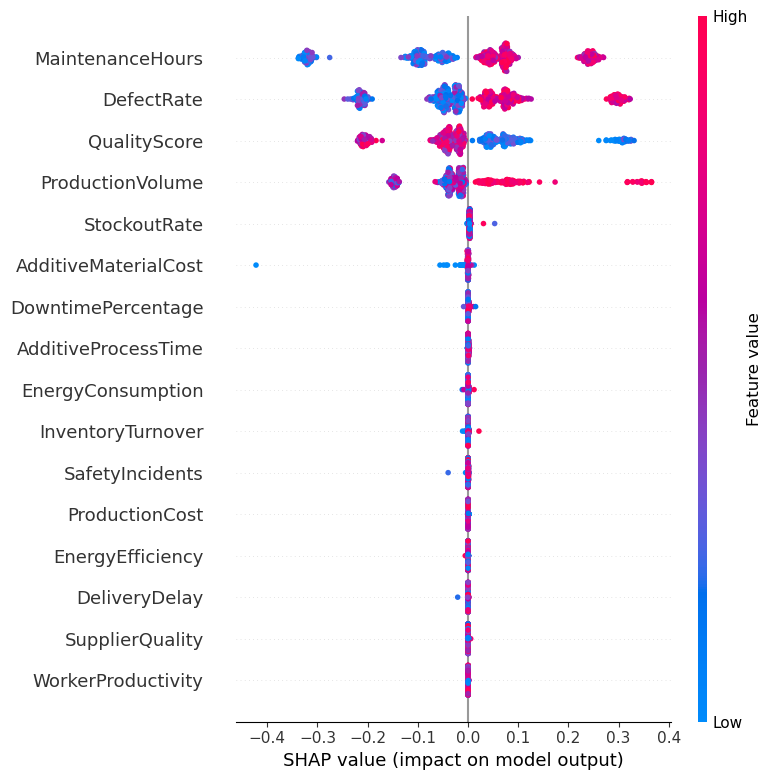

In [27]:
feature_names = X_shap_train.columns
shap.summary_plot(shap_values, X_test, feature_names=feature_names)


In [29]:
#ranking cech - srednia wartosc SHAP
mean_abs = np.abs(shap_values.values).mean(axis=0)
feature_importance = pd.DataFrame({
    'Feature':[f"{i}" for i in (feature_names)], 'Mean SHAP value' : mean_abs})
feature_importance = feature_importance.sort_values('Mean SHAP value', ascending=False)

print(feature_importance)

                 Feature  Mean SHAP value
6       MaintenanceHours         0.128824
4             DefectRate         0.096070
5           QualityScore         0.083776
0       ProductionVolume         0.059709
9           StockoutRate         0.002961
15  AdditiveMaterialCost         0.001317
7     DowntimePercentage         0.000494
14   AdditiveProcessTime         0.000464
12     EnergyConsumption         0.000372
8      InventoryTurnover         0.000372
11       SafetyIncidents         0.000234
1         ProductionCost         0.000098
13      EnergyEfficiency         0.000068
3          DeliveryDelay         0.000055
2        SupplierQuality         0.000052
10    WorkerProductivity         0.000029


In [ ]:
#Usuwanie kolumn z najwmniejszymi wartosciami shap
X_shap_test = X_shap_test.drop(columns=['SafetyIncidents','WorkerProductivity','DeliveryDelay'])
X_shap_train = X_shap_train.drop(columns=['SafetyIncidents','WorkerProductivity','DeliveryDelay'])
X_train = X_shap_train.values
X_test = X_shap_test.values

In [ ]:
#Zuzycie pamieci
i += 1
results_one = []
i +=1
for a in range (5):
    print(a)
    result = measure_training_and_prediction(clf, X_train, y_train, X_test, y_test, call_number=i)
    results_all.append(result)
    results_one.append(result)

0

📦 Wywołanie nr 3
Train: 204.1143 s, 1.7413 MB | Predict: 0.0517 s, 0.2007 MB | Accuracy: 0.9583
1

📦 Wywołanie nr 3
Train: 203.8282 s, 1.8868 MB | Predict: 0.052 s, 0.2007 MB | Accuracy: 0.9583
2

📦 Wywołanie nr 3
Train: 198.7532 s, 1.5865 MB | Predict: 0.0509 s, 0.2007 MB | Accuracy: 0.9537
3

📦 Wywołanie nr 3
Train: 205.5965 s, 1.7574 MB | Predict: 0.0528 s, 0.2007 MB | Accuracy: 0.9568
4

📦 Wywołanie nr 3
Train: 204.3666 s, 1.814 MB | Predict: 0.0515 s, 0.2007 MB | Accuracy: 0.9552


In [ ]:
averages = defaultdict(float)
n = len(results_one)

for result in results_one:
    for key, value in result.items():
        if key != "call_number":  
            averages[key] += value

#  średnia
averages = {key: round(total / n, 4) for key, total in averages.items()}
print(averages)


{'train_time_s': 203.3318, 'train_memory_mb': 1.7572, 'predict_time_s': 0.0518, 'predict_memory_mb': 0.2007, 'accuracy': 0.9565}


In [ ]:
# Czas po usunięciem kolumn nr 1
train_times = []

for a in range(5):
    time_before = check_training_time(X_train, y_train)
    train_times.append(time_before)
    print(f"Czas trenowania przed: {time_before:.2f} s")

# Średnia
avg_time = sum(train_times) / len(train_times)
print(f"Średni czas trenowania: {avg_time:.2f} s")

Czas trenowania przed: 70.64 s
Czas trenowania przed: 71.23 s
Czas trenowania przed: 71.06 s
Czas trenowania przed: 71.80 s
Czas trenowania przed: 71.73 s
Średni czas trenowania: 71.29 s


In [176]:
#Kolejna predykcja
clf_2 = RandomForestShap(n_trees=20)
clf_2.fit(X_train, y_train)
predictions_2 = clf_2.predict(X_test)

acc =  accuracy(y_test, predictions_2)
print(acc)

0.9567901234567902


In [59]:
# Używamy funkcji predict jako modelu
explainer = shap.Explainer(clf_2.predict, X_train, algorithm="permutation")

# Obliczamy wartości SHAP dla danych testowych
shap_values = explainer(X_test)


PermutationExplainer explainer: 649it [15:42,  1.47s/it]                         


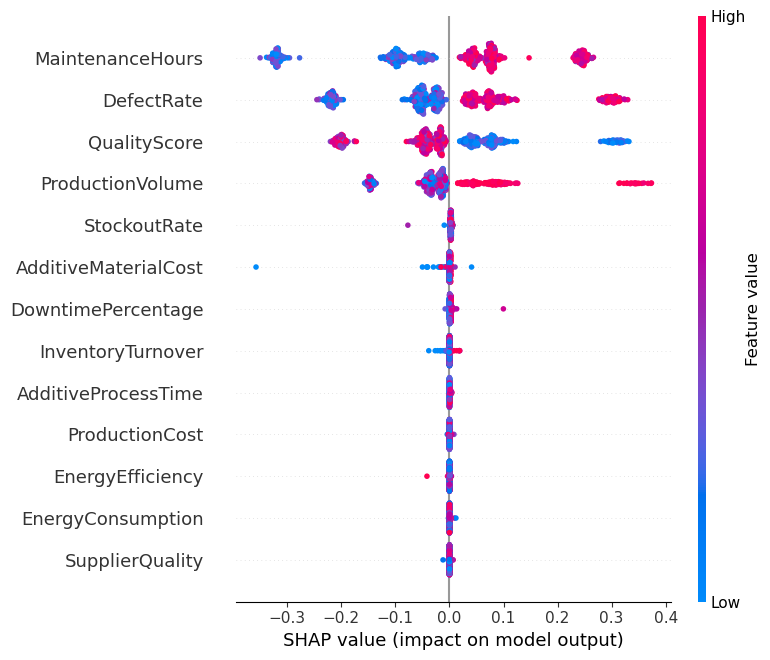

In [61]:
feature_names = X_shap_train.columns
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

In [63]:
#ranking cech - srednia wartosc SHAP
mean_abs = np.abs(shap_values.values).mean(axis=0)
feature_importance = pd.DataFrame({
    'Feature':[f"{i}" for i in (feature_names)], 'Mean SHAP value' : mean_abs})
feature_importance = feature_importance.sort_values('Mean SHAP value', ascending=False)

print(feature_importance)

                 Feature  Mean SHAP value
5       MaintenanceHours         0.129859
3             DefectRate         0.098569
4           QualityScore         0.082997
0       ProductionVolume         0.059195
8           StockoutRate         0.002613
12  AdditiveMaterialCost         0.001633
6     DowntimePercentage         0.001556
7      InventoryTurnover         0.000792
11   AdditiveProcessTime         0.000701
1         ProductionCost         0.000366
10      EnergyEfficiency         0.000233
9      EnergyConsumption         0.000183
2        SupplierQuality         0.000121


In [ ]:
#Usuwanie kolumn 
X_shap_test = X_shap_test.drop(columns=['SupplierQuality','EnergyConsumption','EnergyEfficiency','ProductionCost','AdditiveProcessTime','InventoryTurnover'])
X_shap_train = X_shap_train.drop(columns=['SupplierQuality','EnergyConsumption','EnergyEfficiency','ProductionCost','AdditiveProcessTime','InventoryTurnover'])
X_train = X_shap_train.values
X_test = X_shap_test.values


In [ ]:
print(X_train.shape)  # Sprawdzanie rozmiaru danych po usunięciu kolumn
print(X_test.shape)   


(2592, 7)
(648, 7)


In [ ]:
#Zuzycie pamięci
results_one = []
i +=1
for a in range (5):
    print(a)
    result = measure_training_and_prediction(clf, X_train, y_train, X_test, y_test, call_number=i)
    results_all.append(result)
    results_one.append(result)

0

📦 Wywołanie nr 4
Train: 106.3173 s, 1.2726 MB | Predict: 0.0546 s, 0.2007 MB | Accuracy: 0.9552
1

📦 Wywołanie nr 4
Train: 107.9674 s, 1.4118 MB | Predict: 0.0541 s, 0.2007 MB | Accuracy: 0.9583
2

📦 Wywołanie nr 4
Train: 103.5835 s, 1.4776 MB | Predict: 0.0546 s, 0.2007 MB | Accuracy: 0.9583
3

📦 Wywołanie nr 4
Train: 104.9895 s, 1.4522 MB | Predict: 0.055 s, 0.2007 MB | Accuracy: 0.9583
4

📦 Wywołanie nr 4
Train: 106.0613 s, 1.449 MB | Predict: 0.0547 s, 0.2007 MB | Accuracy: 0.9583


In [ ]:
#wyciągnięcie średniej
average_m(results_one)

{'train_time_s': 105.7838, 'train_memory_mb': 1.4126, 'predict_time_s': 0.0546, 'predict_memory_mb': 0.2007, 'accuracy': 0.9577}


In [ ]:
# Czas po usunięciem kolumn
train_times = []

for a in range(5):
    time_before = check_training_time(X_train, y_train)
    train_times.append(time_before)
    print(f"Czas trenowania po: {time_before:.2f} s")

# Średnia
avg_time = sum(train_times) / len(train_times)
print(f"Średni czas trenowania: {avg_time:.2f} s")

Czas trenowania po: 36.32 s
Czas trenowania po: 36.18 s
Czas trenowania po: 34.83 s
Czas trenowania po: 36.11 s
Czas trenowania po: 36.86 s
Średni czas trenowania: 36.06 s


In [182]:
#Kolejna predykcja
clf_3 = RandomForestShap(n_trees=20)
clf_3.fit(X_train, y_train)
predictions_3 = clf_3.predict(X_test)

acc =  accuracy(y_test, predictions_3)
print(acc)

0.9567901234567902


In [79]:
# Używamy funkcji predict jako modelu
explainer = shap.Explainer(clf_3.predict, X_train, algorithm="permutation")

# Obliczamy wartości SHAP dla danych testowych
shap_values = explainer(X_test)


PermutationExplainer explainer: 649it [16:20,  1.53s/it]                         


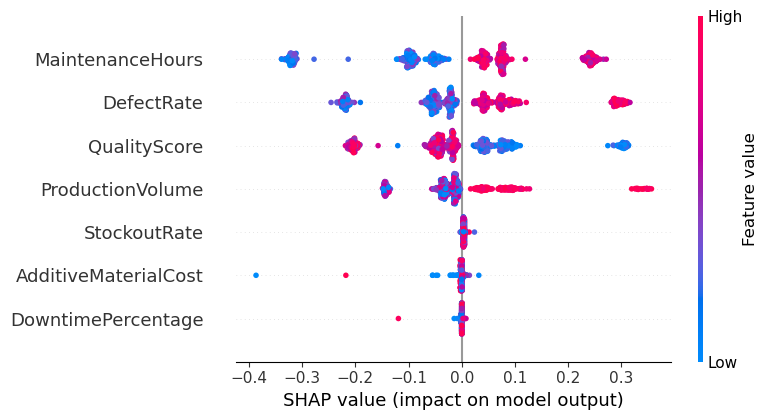

In [81]:
feature_names = X_shap_train.columns
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

In [83]:
#ranking cech - srednia wartosc SHAP
mean_abs = np.abs(shap_values.values).mean(axis=0)
feature_importance = pd.DataFrame({
    'Feature':[f"{i}" for i in (feature_names)], 'Mean SHAP value' : mean_abs})
feature_importance = feature_importance.sort_values('Mean SHAP value', ascending=False)

print(feature_importance)

                Feature  Mean SHAP value
3      MaintenanceHours         0.128658
1            DefectRate         0.097128
2          QualityScore         0.083083
0      ProductionVolume         0.057095
5          StockoutRate         0.003497
6  AdditiveMaterialCost         0.002013
4    DowntimePercentage         0.000672


In [ ]:
#Usuwanie kolumn
X_shap_test = X_shap_test.drop(columns=['DowntimePercentage','AdditiveMaterialCost','StockoutRate'])
X_shap_train = X_shap_train.drop(columns=['DowntimePercentage','AdditiveMaterialCost','StockoutRate'])
X_train = X_shap_train.values
X_test = X_shap_test.values


In [ ]:
#zużycie pamięci
results_one = []
i +=1
for a in range (5):
    print(a)
    result = measure_training_and_prediction(clf, X_train, y_train, X_test, y_test, call_number=i)
    results_all.append(result)
    results_one.append(result)

0

📦 Wywołanie nr 5
Train: 52.6355 s, 1.2469 MB | Predict: 0.057 s, 0.2007 MB | Accuracy: 0.9537
1

📦 Wywołanie nr 5
Train: 52.2706 s, 1.1045 MB | Predict: 0.0566 s, 0.2007 MB | Accuracy: 0.9537
2

📦 Wywołanie nr 5
Train: 52.9077 s, 1.2301 MB | Predict: 0.0566 s, 0.2007 MB | Accuracy: 0.9537
3

📦 Wywołanie nr 5
Train: 51.397 s, 1.0728 MB | Predict: 0.0546 s, 0.2007 MB | Accuracy: 0.9537
4

📦 Wywołanie nr 5
Train: 51.8408 s, 1.0602 MB | Predict: 0.0554 s, 0.2012 MB | Accuracy: 0.9522


In [ ]:
#średnie zużycie pamięci
average_m(results_one)

{'train_time_s': 52.2103, 'train_memory_mb': 1.1429, 'predict_time_s': 0.056, 'predict_memory_mb': 0.2008, 'accuracy': 0.9534}


In [ ]:
# Czas po usunięciu kolumn
train_times = []

for a in range(5):
    time_before = check_training_time(X_train, y_train)
    train_times.append(time_before)
    print(f"Czas trenowania po: {time_before:.2f} s")

# Średnia
avg_time = sum(train_times) / len(train_times)
print(f"Średni czas trenowania: {avg_time:.2f} s")

Czas trenowania po: 18.16 s
Czas trenowania po: 18.44 s
Czas trenowania po: 18.20 s
Czas trenowania po: 18.15 s
Czas trenowania po: 17.93 s
Średni czas trenowania: 18.18 s


In [29]:
#Kolejna predykcja
clf_4 = RandomForestShap(n_trees=20)
clf_4.fit(X_train, y_train)
predictions_4 = clf_4.predict(X_test)

acc =  accuracy(y_test, predictions_4)
print(acc)

0.9567901234567902


In [31]:
# Używamy funkcji predict jako modelu
explainer = shap.Explainer(clf_4.predict, X_train, algorithm="permutation")

# Obliczamy wartości SHAP dla danych testowych
shap_values = explainer(X_test)


PermutationExplainer explainer: 649it [16:24,  1.53s/it]                         


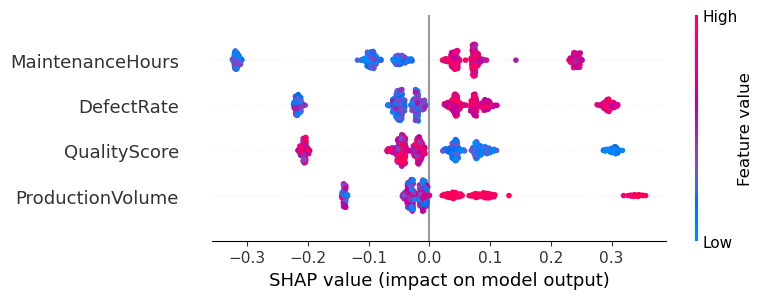

In [33]:
feature_names = X_shap_train.columns
shap.summary_plot(shap_values, X_test, feature_names=feature_names)


In [55]:
#Usuwanie kolumny Parch
X_shap_test = X_shap_test.drop(columns=['ProductionVolume'])
X_shap_train = X_shap_train.drop(columns=['ProductionVolume'])
X_train = X_shap_train.values
X_test = X_shap_test.values


In [57]:
results_one = []
i +=1
for a in range (5):
    print(a)
    result = measure_training_and_prediction(clf, X_train, y_train, X_test, y_test, call_number=i)
    results_all.append(result)
    results_one.append(result)

0

📦 Wywołanie nr 6
Train: 42.2379 s, 1.4053 MB | Predict: 0.0609 s, 0.2007 MB | Accuracy: 0.9259
1

📦 Wywołanie nr 6
Train: 42.3325 s, 1.2856 MB | Predict: 0.06 s, 0.2007 MB | Accuracy: 0.929
2

📦 Wywołanie nr 6
Train: 43.0049 s, 1.2186 MB | Predict: 0.0625 s, 0.2007 MB | Accuracy: 0.9198
3

📦 Wywołanie nr 6
Train: 42.1152 s, 1.1239 MB | Predict: 0.0603 s, 0.2007 MB | Accuracy: 0.9275
4

📦 Wywołanie nr 6
Train: 42.1904 s, 1.1777 MB | Predict: 0.0605 s, 0.2007 MB | Accuracy: 0.9228


In [59]:
average_m(results_one)

{'train_time_s': 42.3762, 'train_memory_mb': 1.2422, 'predict_time_s': 0.0608, 'predict_memory_mb': 0.2007, 'accuracy': 0.925}


In [61]:
# Czas przed usunięciem kolumn
train_times = []

for a in range(5):
    time_before = check_training_time(X_train, y_train)
    train_times.append(time_before)
    print(f"Czas trenowania przed: {time_before:.2f} s")

# Średnia
avg_time = sum(train_times) / len(train_times)
print(f"Średni czas trenowania: {avg_time:.2f} s")

Czas trenowania przed: 14.15 s
Czas trenowania przed: 14.24 s
Czas trenowania przed: 14.36 s
Czas trenowania przed: 14.61 s
Czas trenowania przed: 14.19 s
Średni czas trenowania: 14.31 s


In [63]:
#Kolejna predykcja
clf_5 = RandomForestShap(n_trees=20)
clf_5.fit(X_train, y_train)
predictions_5 = clf_5.predict(X_test)

acc =  accuracy(y_test, predictions_5)
print(acc)

0.9290123456790124


In [ ]:
# Czas przed usunięciem kolumn
time_pred_before = check_prediction_time(X_test)
print(f"Czas predykcji po: {time_pred_before:.2f} s")


In [65]:
# Używamy funkcji predict jako modelu
explainer = shap.Explainer(clf_5.predict, X_train, algorithm="permutation")

# Obliczamy wartości SHAP dla danych testowych
shap_values = explainer(X_test)


PermutationExplainer explainer: 649it [17:43,  1.65s/it]                         


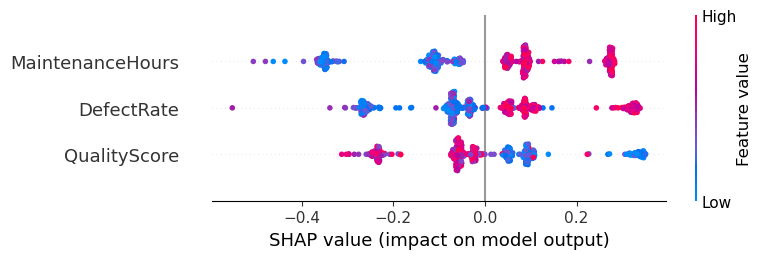

In [67]:
feature_names = X_shap_train.columns
shap.summary_plot(shap_values, X_test, feature_names=feature_names)


In [69]:
#ranking cech - srednia wartosc SHAP
mean_abs = np.abs(shap_values.values).mean(axis=0)
feature_importance = pd.DataFrame({
    'Feature':[f"{i}" for i in (feature_names)], 'Mean SHAP value' : mean_abs})
feature_importance = feature_importance.sort_values('Mean SHAP value', ascending=False)

print(feature_importance)

            Feature  Mean SHAP value
2  MaintenanceHours         0.164362
0        DefectRate         0.132554
1      QualityScore         0.113501


In [71]:
#Usuwanie kolumny Parch
X_shap_test = X_shap_test.drop(columns=['QualityScore'])
X_shap_train = X_shap_train.drop(columns=['QualityScore'])
X_train = X_shap_train.values
X_test = X_shap_test.values


In [73]:
results_one = []
i +=1
for a in range (5):
    print(a)
    result = measure_training_and_prediction(clf, X_train, y_train, X_test, y_test, call_number=i)
    results_all.append(result)
    results_one.append(result)

0

📦 Wywołanie nr 7
Train: 22.7292 s, 1.2409 MB | Predict: 0.0614 s, 0.2007 MB | Accuracy: 0.841
1

📦 Wywołanie nr 7
Train: 22.1161 s, 1.2967 MB | Predict: 0.0612 s, 0.2007 MB | Accuracy: 0.8472
2

📦 Wywołanie nr 7
Train: 22.6298 s, 1.2963 MB | Predict: 0.0622 s, 0.2009 MB | Accuracy: 0.838
3

📦 Wywołanie nr 7
Train: 22.2834 s, 1.2753 MB | Predict: 0.0623 s, 0.2007 MB | Accuracy: 0.8395
4

📦 Wywołanie nr 7
Train: 22.4356 s, 1.2018 MB | Predict: 0.0621 s, 0.2007 MB | Accuracy: 0.8457


In [75]:
average_m(results_one)

{'train_time_s': 22.4388, 'train_memory_mb': 1.2622, 'predict_time_s': 0.0618, 'predict_memory_mb': 0.2007, 'accuracy': 0.8423}


In [77]:
# Czas przed usunięciem kolumn
train_times = []

for a in range(5):
    time_before = check_training_time(X_train, y_train)
    train_times.append(time_before)
    print(f"Czas trenowania przed: {time_before:.2f} s")

# Średnia
avg_time = sum(train_times) / len(train_times)
print(f"Średni czas trenowania: {avg_time:.2f} s")

Czas trenowania przed: 7.83 s
Czas trenowania przed: 7.69 s
Czas trenowania przed: 7.66 s
Czas trenowania przed: 7.69 s
Czas trenowania przed: 7.65 s
Średni czas trenowania: 7.70 s


In [79]:
#Kolejna predykcja
clf_6 = RandomForestShap(n_trees=20)
clf_6.fit(X_train, y_train)
predictions_6 = clf_6.predict(X_test)

acc =  accuracy(y_test, predictions_6)
print(acc)

0.8302469135802469


In [81]:
# Używamy funkcji predict jako modelu
explainer = shap.Explainer(clf_6.predict, X_train, algorithm="permutation")

# Obliczamy wartości SHAP dla danych testowych
shap_values = explainer(X_test)


PermutationExplainer explainer: 649it [18:37,  1.74s/it]                         


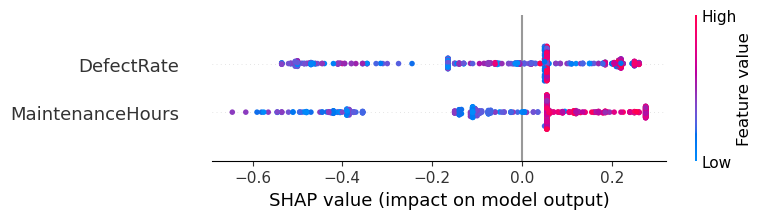

In [83]:
feature_names = X_shap_train.columns
shap.summary_plot(shap_values, X_test, feature_names=feature_names)


In [85]:
#ranking cech - srednia wartosc SHAP
mean_abs = np.abs(shap_values.values).mean(axis=0)
feature_importance = pd.DataFrame({
    'Feature':[f"{i}" for i in (feature_names)], 'Mean SHAP value' : mean_abs})
feature_importance = feature_importance.sort_values('Mean SHAP value', ascending=False)

print(feature_importance)

            Feature  Mean SHAP value
0        DefectRate         0.174900
1  MaintenanceHours         0.162554


In [87]:
#Usuwanie kolumny Parch
X_shap_test = X_shap_test.drop(columns=['MaintenanceHours'])
X_shap_train = X_shap_train.drop(columns=['MaintenanceHours'])
X_train = X_shap_train.values
X_test = X_shap_test.values


In [89]:
results_one = []
i +=1
for a in range (5):
    print(a)
    result = measure_training_and_prediction(clf, X_train, y_train, X_test, y_test, call_number=i)
    results_all.append(result)
    results_one.append(result)

0

📦 Wywołanie nr 8
Train: 23.8392 s, 1.2678 MB | Predict: 0.0681 s, 0.2007 MB | Accuracy: 0.8256
1

📦 Wywołanie nr 8
Train: 24.5361 s, 1.1692 MB | Predict: 0.0684 s, 0.2007 MB | Accuracy: 0.8241
2

📦 Wywołanie nr 8
Train: 24.3329 s, 1.1179 MB | Predict: 0.0679 s, 0.2007 MB | Accuracy: 0.8241
3

📦 Wywołanie nr 8
Train: 24.0148 s, 1.1426 MB | Predict: 0.0705 s, 0.2007 MB | Accuracy: 0.821
4

📦 Wywołanie nr 8
Train: 24.1766 s, 1.1001 MB | Predict: 0.07 s, 0.2007 MB | Accuracy: 0.8256


In [91]:
average_m(results_one)

{'train_time_s': 24.1799, 'train_memory_mb': 1.1595, 'predict_time_s': 0.069, 'predict_memory_mb': 0.2007, 'accuracy': 0.8241}


In [93]:
# Czas przed usunięciem kolumn
train_times = []

for a in range(5):
    time_before = check_training_time(X_train, y_train)
    train_times.append(time_before)
    print(f"Czas trenowania przed: {time_before:.2f} s")

# Średnia
avg_time = sum(train_times) / len(train_times)
print(f"Średni czas trenowania: {avg_time:.2f} s")

Czas trenowania przed: 8.17 s
Czas trenowania przed: 8.08 s
Czas trenowania przed: 8.03 s
Czas trenowania przed: 8.04 s
Czas trenowania przed: 8.24 s
Średni czas trenowania: 8.11 s


In [95]:
#Kolejna predykcja
clf_7 = RandomForestShap(n_trees=20)
clf_7.fit(X_train, y_train)
predictions_7 = clf_7.predict(X_test)

acc =  accuracy(y_test, predictions_7)
print(acc)

0.8240740740740741
